In [11]:
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas

You should consider upgrading via the 'd:\jojo\stuff\notebooks\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'd:\jojo\stuff\notebooks\scripts\python.exe -m pip install --upgrade pip' command.


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In the previous example, we used a sample that had only one number.  Now we are going to look at cases where we have multiple numbers.

Let's say our training set is

|y |
|--|
|5 |
|5 |
|5 |

- Our sample size, $m$, is 3
- Our sample index, $i$, goes from 1 to 3 (or maybe 0 to 2 in Python world)
- Our number of input is (still) 0

In [13]:
training_y = np.array([5, 5, 5])

And let's say we start with $h = 0$

Our calcaulation of cost $J$ is a bit different now with multiple samples.  We need to sum up the cost of each sample.

In [14]:
hypothesis = 0
def cost(hypothesis, training_y):
    return np.sum((hypothesis - training_y) ** 2) / 2
cost(hypothesis, training_y)

37.5

And before we start doing our gradient descent to find minimum cost $J$, let's just plot $h$ vs $J$.

In [15]:
# try calculating cost for hypothesis
possible_hypotheses = np.arange(0, 10, 1)

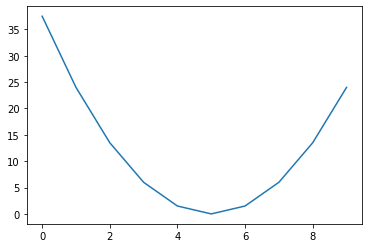

In [16]:
plt.plot(possible_hypotheses, [cost(hypothesis, training_y) for hypothesis in possible_hypotheses])

And as seen here, we have minimum cost at $h = 5$

Our calculation of slope is also a bit different.  We need to calculate the slope for each sample and then sum up all the slopes.

In [17]:
def slope(hypothesis, training_y):
    return np.sum((hypothesis - training_y) * 1)
slope(hypothesis, training_y)

-15

Each step of adjusting our hypothesis is called gradient descent.  So let's make a function for that:

In [18]:
def gradient_descent(hypothesis, training_y, learning_rate_alpha):
    return hypothesis - learning_rate_alpha * slope(hypothesis, training_y)
gradient_descent(hypothesis, training_y, 0.1)

1.5

This will take while, so let our computer do this:

In [19]:
def find_minimum():
    hypothesis = 0
    iteration = 0
    acceptable_slope = 0.05
    learning_rate_alpha = 0.1
    current_slope = slope(hypothesis, training_y)
    current_cost = 0
    while abs(current_slope) > acceptable_slope and iteration < 100:
        current_cost = cost(hypothesis, training_y)
        current_slope = slope(hypothesis, training_y)
        hypothesis = gradient_descent(hypothesis, training_y, learning_rate_alpha)
        print((hypothesis, current_slope, current_cost))
        iteration += 1
    return (hypothesis, current_slope, current_cost)

In [20]:
find_minimum()

(1.5, -15, 37.5)
(2.55, -10.5, 18.375)
(3.285, -7.3500000000000005, 9.003750000000002)
(3.7995, -5.145, 4.411837499999999)
(4.15965, -3.6014999999999997, 2.161800375)
(4.411755, -2.52105, 1.0592821837499997)
(4.5882285000000005, -1.764734999999999, 0.5190482700374994)
(4.71175995, -1.2353144999999985, 0.2543336523183744)
(4.798231965, -0.8647201499999992, 0.12462348963600353)
(4.8587623755000005, -0.6053041049999992, 0.06106550992164168)
(4.90113366285, -0.42371287349999864, 0.02992209986160431)
(4.9307935639950005, -0.2965990114499988, 0.014661828932186084)
(4.951555494796501, -0.20761930801499862, 0.007184296176771144)
(4.96608884635755, -0.14533351561049823, 0.0035203051266178226)
(4.976262192450285, -0.10173346092734903, 0.001724949512042742)
(4.9833835347152, -0.07121342264914432, 0.0008452252609009435)
(4.98836847430064, -0.04984939585439996, 0.00041416037784144466)


(4.98836847430064, -0.04984939585439996, 0.00041416037784144466)

For fun

- Set initial hypothesis to a number greater than 5 and see our algorithm moving it down to 5.
- Set training_y to be more than one number.
- Try a large $\alpha$ and see our algorithm hopping back and forth around 5.